In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from itertools import permutations, product, combinations
from scipy.stats import pearsonr, spearmanr

from sklearn.manifold import TSNE

from sklearn.preprocessing import StandardScaler

# Settings

In [2]:
#analysis = "Fastcore"
#analysis = "gimme"
#analysis = "iMAT"
#analysis = "init"
analysis = "tinit"

In [3]:
n_components= 2
perplexity = 8 #8 # 30.0

## Read the data

In [4]:
if analysis == "Fastcore":
    df = pd.read_csv("data\\"+analysis+"_rxnMatrix.csv", sep=",")
    df = df.drop(columns='Unnamed: 0')
else:
    df = pd.read_csv("data\\"+analysis+"_rxnMatrix.csv", sep=";")

In [5]:
df

,Row,tinit_GSM1405485,tinit_GSM1405486,tinit_GSM1405487,tinit_GSM1405488,tinit_GSM1405489,tinit_GSM1405491,tinit_GSM1405492,tinit_GSM1405493,tinit_GSM1405494,...,tinit_GSM1405519,tinit_GSM1405520,tinit_HFC_ALL,tinit_HFC_KO,tinit_HFC_WT,tinit_HFnC_ALL,tinit_HFnC_KO,tinit_HFnC_WT,tinit_LFnC_KO,tinit_LFnC_WT
0,10FTHF5GLUtl,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10FTHF5GLUtm,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10FTHF6GLUtl,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10FTHF6GLUtm,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10FTHF7GLUtl,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10607,PIK3,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
10608,PI4P3K,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
10609,PI5P3K,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
10610,PIACGT,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [6]:
M = np.transpose(df.values[:,1:])
models = list(df.columns[1:])
models = list(map(lambda x: x.split("_")[1].split(".")[0], models))

### Grouping by genotype

In [7]:
# WT
genotype0 = ["GSM1405493","GSM1405505","GSM1405517", 
              "GSM1405489","GSM1405501","GSM1405513",
              "GSM1405485","GSM1405497","GSM1405509",
              "GSM1405494","GSM1405506","GSM1405518",
              "GSM1405490","GSM1405502","GSM1405514",
              "GSM1405486","GSM1405498","GSM1405510"]
# KO
genotype1 = ["GSM1405495","GSM1405507","GSM1405519",
              "GSM1405491","GSM1405503","GSM1405515",
              "GSM1405487","GSM1405499","GSM1405511",
              "GSM1405496","GSM1405508","GSM1405520",
              "GSM1405492","GSM1405504","GSM1405516",
              "GSM1405488","GSM1405500","GSM1405512"]
genotype = (genotype0, genotype1)

### Grouping by diet

In [8]:
# LFnC
diet0 = ["GSM1405485","GSM1405497","GSM1405509","GSM1405487","GSM1405499","GSM1405511",
         "GSM1405486","GSM1405498","GSM1405510","GSM1405488","GSM1405500","GSM1405512"]

# HFnC
diet1 = ["GSM1405489","GSM1405501","GSM1405513","GSM1405491","GSM1405503","GSM1405515",
         "GSM1405490","GSM1405502","GSM1405514","GSM1405492","GSM1405504","GSM1405516"]

# HFC
diet2 = ["GSM1405493","GSM1405505","GSM1405517","GSM1405495","GSM1405507","GSM1405519",
         "GSM1405494","GSM1405506","GSM1405518","GSM1405496","GSM1405508","GSM1405520"]

diet = (diet0, diet1, diet2)

### Grouping by gender

In [9]:
# F
gender0 = ["GSM1405493","GSM1405505","GSM1405517",
           "GSM1405489","GSM1405501","GSM1405513",
           "GSM1405485","GSM1405497","GSM1405509",
           "GSM1405495","GSM1405507","GSM1405519",
           "GSM1405491","GSM1405503","GSM1405515",
           "GSM1405487","GSM1405499","GSM1405511"]

# M
gender1 = ["GSM1405494","GSM1405506","GSM1405518",
           "GSM1405490","GSM1405502","GSM1405514",
           "GSM1405486","GSM1405498","GSM1405510",
           "GSM1405496","GSM1405508","GSM1405520",
           "GSM1405492","GSM1405504","GSM1405516",
           "GSM1405488","GSM1405500","GSM1405512"]

gender = (gender0, gender1)

In [10]:
groups = {"genotype": genotype, "diet": diet, "gender": gender}
labels = {"genotype": ("WT","KO"), "diet": ("LFnC", "HFnC", "HFC"), "gender": ("F","M")}

## Generate data

In [11]:
"""
models = ["M1", "M2", "M3", "M4", "M5", "M6"]

groups = {
    "gender": (["M1", "M2", "M3"], ["M4", "M5", "M6"]),#, "M7", "M8"]),
    "phenotype": (["M1", "M4"], ["M2", "M5"], ["M3", "M6"]),
    "diet": (["M1", "M5"], ["M2", "M6"], ["M3", "M4"])}
"""

"""
# number of fictional reactions
n_R = 100
"""

#M = np.random.randint(2, size=(len(models), n_R))

"""
# Let's say that reactions are dependent only on gender
M[np.isin(models, groups['gender'][0]),:n_R//2] = 1
M[np.isin(models, groups['gender'][0]),n_R//2:] = 0

M[np.isin(models, groups['gender'][1]),:n_R//2] = 0
M[np.isin(models, groups['gender'][1]),n_R//2:] = 1
"""

#M[np.isin(models, groups['phenotype'][0]),:] = 1
#M[np.isin(models, groups['phenotype'][1]),:] = 0


"\n# Let's say that reactions are dependent only on gender\nM[np.isin(models, groups['gender'][0]),:n_R//2] = 1\nM[np.isin(models, groups['gender'][0]),n_R//2:] = 0\n\nM[np.isin(models, groups['gender'][1]),:n_R//2] = 0\nM[np.isin(models, groups['gender'][1]),n_R//2:] = 1\n"

## Preprocessing

Remove the reactions that are always 0 or always 1

In [12]:
M = M[:,~np.all(M==0, axis=0)]
M = M[:,~np.all(M==1, axis=0)]

In [13]:
M = np.array(M, dtype=float)

Zero centering the rows

In [14]:
M = StandardScaler(with_mean=True, with_std=False).fit_transform(M) #centering only

## t-SNE

In [15]:
tSNE = TSNE(n_components=n_components, perplexity = perplexity,  n_iter=5000)
comps = tSNE.fit_transform(M)
df = pd.DataFrame(data = comps, columns = ['PC1', 'PC2', 'PC3'][:n_components])
df['model'] = models


In [16]:
# explained variance for t-SNE?
"""
df_pca = pd.DataFrame()
df_pca = df_pca.append(pd.DataFrame(pca.explained_variance_).T)
df_pca = df_pca.append(pd.DataFrame(pca.explained_variance_ratio_).T)
df_pca.columns = ['PC1', 'PC2', 'PC3']
df_pca['label'] = ['explained variance', 'explained variance ratio']
df_pca = df_pca.set_index('label')
df_pca.to_csv("results_tSNE\\"+analysis+"_explained_variance.csv")
"""

'\ndf_pca = pd.DataFrame()\ndf_pca = df_pca.append(pd.DataFrame(pca.explained_variance_).T)\ndf_pca = df_pca.append(pd.DataFrame(pca.explained_variance_ratio_).T)\ndf_pca.columns = [\'PC1\', \'PC2\', \'PC3\']\ndf_pca[\'label\'] = [\'explained variance\', \'explained variance ratio\']\ndf_pca = df_pca.set_index(\'label\')\ndf_pca.to_csv("results_tSNE\\"+analysis+"_explained_variance.csv")\n'

In [17]:
#pca_explained = pca.explained_variance_ratio_

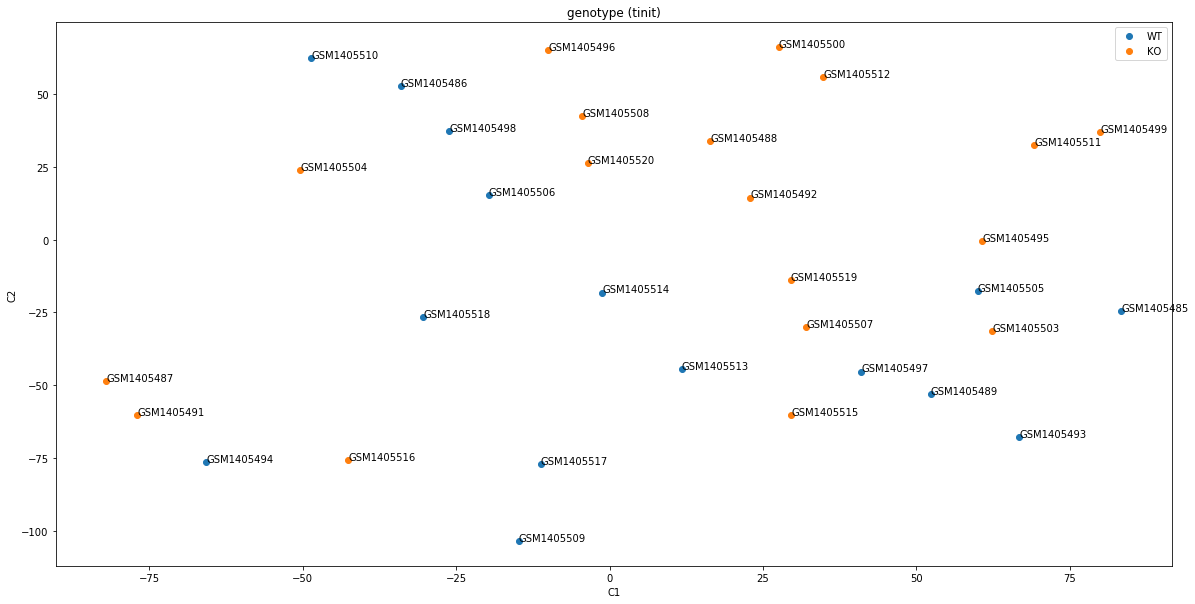

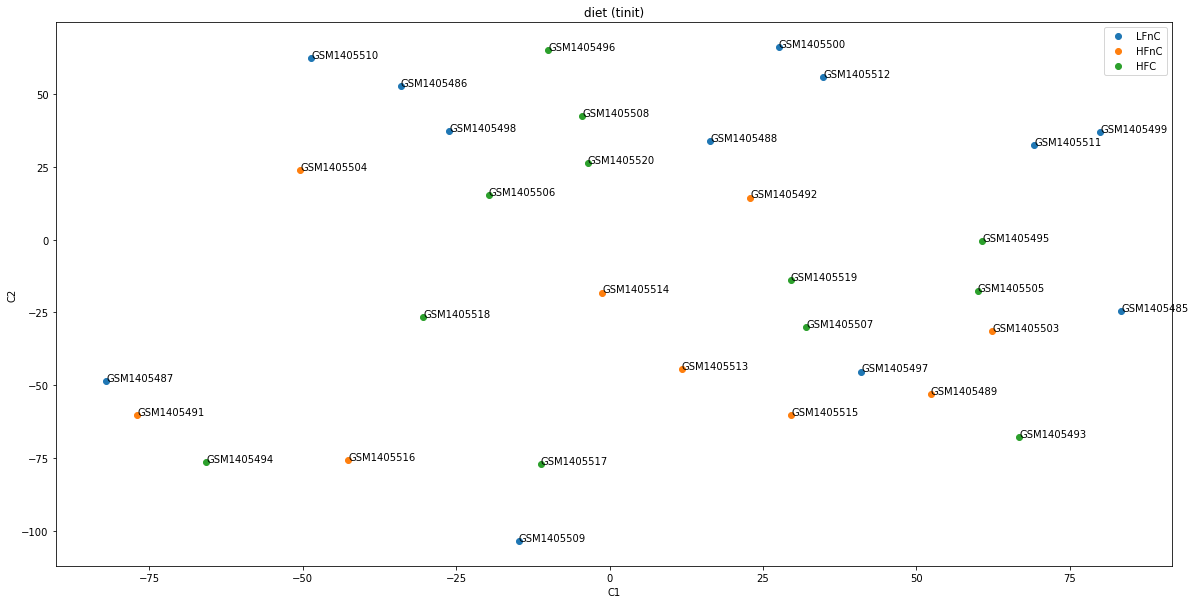

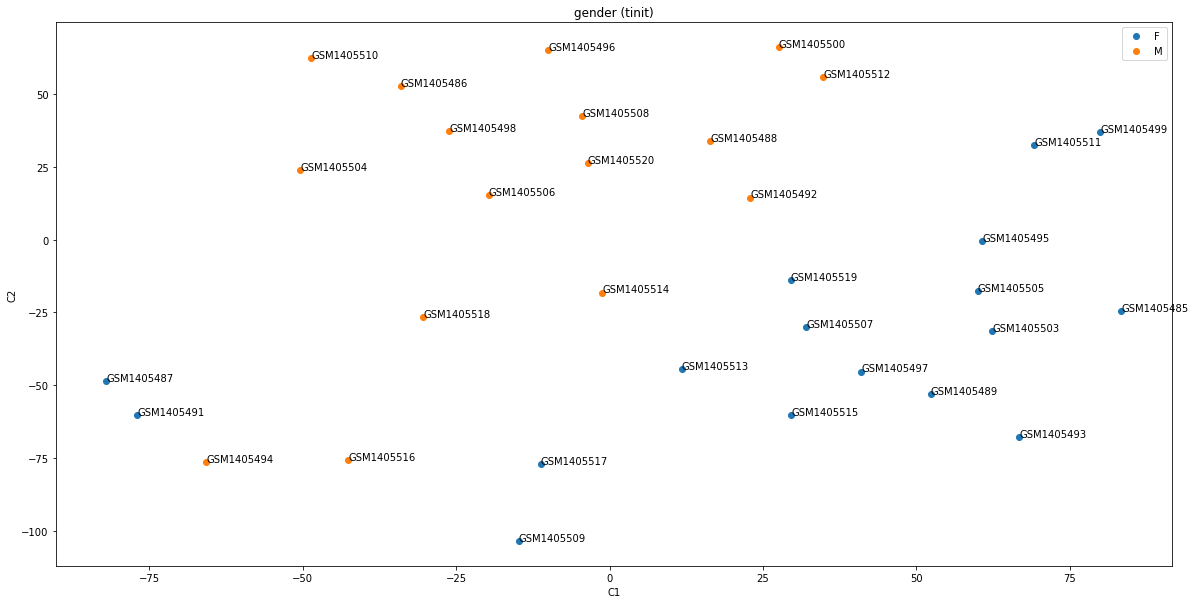

In [18]:
for c in combinations(range(n_components), 2):
    i1 = c[0]
    i2 = c[1]
    for group in groups:        
        for subgroup, label in zip(groups[group], labels[group]):
            locs = np.isin(models, subgroup)
            plt.plot(comps[locs,i1], comps[locs,i2],"o", label=label)

        for model, x, y in zip(models, comps[:,i1], comps[:,i2]):
            #plt.text(x,y,model[6:])
            for subgroup in groups[group]:
                if model in subgroup:            
                    plt.text(x+0.05,y+0.05,model)

        plt.title(group + " (" + analysis+")")
        plt.xlabel("C"+str(i1+1))#plt.xlabel("PC"+str(i1+1) + " (" + str(round(100*pca_explained[i1],2))+"%)")
        plt.ylabel("C"+str(i2+1))#plt.ylabel("PC"+str(i2+1) + " (" + str(round(100*pca_explained[i2],2))+"%)")
        plt.legend()
        plt.gcf().set_size_inches(20,10)
        plt.savefig("figures_tSNE\\"+analysis+"_C"+str(i1+1)+'_'+"C"+str(i2+1)+'_'+group+"_perplexity_"+str(perplexity)+".pdf", format="pdf", bbox_inches = 'tight')
        plt.savefig("figures_tSNE\\"+analysis+"_C"+str(i1+1)+'_'+"C"+str(i2+1)+'_'+group+"_perplexity_"+str(perplexity)+".png", format="png", bbox_inches = 'tight')
        plt.show()

In [19]:
groups

{'genotype': (['GSM1405493',
   'GSM1405505',
   'GSM1405517',
   'GSM1405489',
   'GSM1405501',
   'GSM1405513',
   'GSM1405485',
   'GSM1405497',
   'GSM1405509',
   'GSM1405494',
   'GSM1405506',
   'GSM1405518',
   'GSM1405490',
   'GSM1405502',
   'GSM1405514',
   'GSM1405486',
   'GSM1405498',
   'GSM1405510'],
  ['GSM1405495',
   'GSM1405507',
   'GSM1405519',
   'GSM1405491',
   'GSM1405503',
   'GSM1405515',
   'GSM1405487',
   'GSM1405499',
   'GSM1405511',
   'GSM1405496',
   'GSM1405508',
   'GSM1405520',
   'GSM1405492',
   'GSM1405504',
   'GSM1405516',
   'GSM1405488',
   'GSM1405500',
   'GSM1405512']),
 'diet': (['GSM1405485',
   'GSM1405497',
   'GSM1405509',
   'GSM1405487',
   'GSM1405499',
   'GSM1405511',
   'GSM1405486',
   'GSM1405498',
   'GSM1405510',
   'GSM1405488',
   'GSM1405500',
   'GSM1405512'],
  ['GSM1405489',
   'GSM1405501',
   'GSM1405513',
   'GSM1405491',
   'GSM1405503',
   'GSM1405515',
   'GSM1405490',
   'GSM1405502',
   'GSM1405514',
   'GSM

# Sort and correlate (faster)

In [20]:
"""
factors = list(groups.keys())
Rs = np.zeros((len(factors), 3))
rhos = np.zeros((len(factors), 3))


for ii, factor in enumerate(groups):
    scores1 = []
    scores2 = []
    scores3 = []
    for i in range(len(groups[factor])):
        idxs = np.array(np.where(np.isin(models, groups[factor][i])==True)).flatten()
        scores1.append(sorted(df.iloc[idxs, 0].values))
        scores2.append(sorted(df.iloc[idxs, 1].values))
        scores3.append(sorted(df.iloc[idxs, 2].values))
        
    for idx in permutations(range(len(scores1))):
        s1 = []
        s2 = []
        s3 = []        
        for i in idx:
            s1 += scores1[i]
            s2 += scores2[i]
            s3 += scores3[i]
            
        
        R_PC1 = pearsonr(np.arange(len(s1)), s1)[0]
        R_PC2 = pearsonr(np.arange(len(s2)), s2)[0]
        R_PC3 = pearsonr(np.arange(len(s3)), s3)[0]

        rho_PC1 = spearmanr(np.arange(len(s1)), s1)[0]
        rho_PC2 = spearmanr(np.arange(len(s2)), s2)[0]
        rho_PC3 = spearmanr(np.arange(len(s3)), s3)[0]

        Rs[ii, 0] = max(Rs[ii, 0], abs(R_PC1))
        Rs[ii, 1] = max(Rs[ii, 1], abs(R_PC2))
        Rs[ii, 2] = max(Rs[ii, 2], abs(R_PC3))

        rhos[ii, 0] = max(rhos[ii, 0], abs(rho_PC1))
        rhos[ii, 1] = max(rhos[ii, 1], abs(rho_PC2))
        rhos[ii, 2] = max(rhos[ii, 2], abs(rho_PC3))

""" 

'\nfactors = list(groups.keys())\nRs = np.zeros((len(factors), 3))\nrhos = np.zeros((len(factors), 3))\n\n\nfor ii, factor in enumerate(groups):\n    scores1 = []\n    scores2 = []\n    scores3 = []\n    for i in range(len(groups[factor])):\n        idxs = np.array(np.where(np.isin(models, groups[factor][i])==True)).flatten()\n        scores1.append(sorted(df.iloc[idxs, 0].values))\n        scores2.append(sorted(df.iloc[idxs, 1].values))\n        scores3.append(sorted(df.iloc[idxs, 2].values))\n        \n    for idx in permutations(range(len(scores1))):\n        s1 = []\n        s2 = []\n        s3 = []        \n        for i in idx:\n            s1 += scores1[i]\n            s2 += scores2[i]\n            s3 += scores3[i]\n            \n        \n        R_PC1 = pearsonr(np.arange(len(s1)), s1)[0]\n        R_PC2 = pearsonr(np.arange(len(s2)), s2)[0]\n        R_PC3 = pearsonr(np.arange(len(s3)), s3)[0]\n\n        rho_PC1 = spearmanr(np.arange(len(s1)), s1)[0]\n        rho_PC2 = spearman

## Postprocessing

### Pearson

In [21]:
"""
Rs2 = Rs ** 2 # coefficient of determination

df_R2 = pd.DataFrame(data = Rs2, columns = ['R2(PC1)', 'R2(PC2)', 'R2(PC3)'])
df_R2['factor'] = groups.keys()

df_R2=df_R2.set_index('factor')

df_R2.to_csv("results_PCA\\"+analysis+"_pearson_variability_explained.csv")
"""

'\nRs2 = Rs ** 2 # coefficient of determination\n\ndf_R2 = pd.DataFrame(data = Rs2, columns = [\'R2(PC1)\', \'R2(PC2)\', \'R2(PC3)\'])\ndf_R2[\'factor\'] = groups.keys()\n\ndf_R2=df_R2.set_index(\'factor\')\n\ndf_R2.to_csv("results_PCA\\"+analysis+"_pearson_variability_explained.csv")\n'

### Spearman

In [22]:
"""
rhos2 = rhos ** 2 # coefficient of determination

df_rho2 = pd.DataFrame(data = rhos2, columns = ['Rho2(PC1)', 'Rho2(PC2)', 'Rho2(PC3)'])
df_rho2['factor'] = groups.keys()

df_rho2=df_rho2.set_index('factor')

df_rho2.to_csv("results_PCA\\"+analysis+"_spearman_variability_explained.csv")
"""

'\nrhos2 = rhos ** 2 # coefficient of determination\n\ndf_rho2 = pd.DataFrame(data = rhos2, columns = [\'Rho2(PC1)\', \'Rho2(PC2)\', \'Rho2(PC3)\'])\ndf_rho2[\'factor\'] = groups.keys()\n\ndf_rho2=df_rho2.set_index(\'factor\')\n\ndf_rho2.to_csv("results_PCA\\"+analysis+"_spearman_variability_explained.csv")\n'